**Обучение модели**

Выполненные пункты:

1.   Импортируем датасет и смотрим информацию о структуре и содержимом данных
2.   Разделяем датасет на тренировочную и тестовую выборки (70/30)
3.   Находим лучшие гипер параметры для модели CatBoostRegressor
4.   Выводим лучший score и гипер параметры
5.   Обучаем модель CatBoostRegressor на лучших гипер параметров
6.   Выводим метрики модель
7.   Выводим график "Кривая обучения"  модели
8.   Сохраняем лучшую модель
9.   Выводим график "Важности признаков"
10.  Выводим систему оценивания объектов недвижимости по их параметрам

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import learning_curve


pd.set_option('display.max_columns', None)


## 1) Импортируем датасет и смотрим информацию о структуре и содержимом данных

In [ ]:
data_result = pd.read_excel('/content/drive/MyDrive/E-soft/ТЗ/ver_final/data_sold_flats_result.xlsx')
display(data_result.info())
display(data_result.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58430 entries, 0 to 58429
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   city_id           58430 non-null  int64  
 1   district_id       58430 non-null  int64  
 2   street_id         58430 non-null  int64  
 3   sold_price        58430 non-null  int64  
 4   metro_station_id  58430 non-null  int64  
 5   floor_num         58430 non-null  int64  
 6   floors_cnt        58430 non-null  int64  
 7   rooms_cnt         58430 non-null  int64  
 8   bedrooms_cnt      58430 non-null  int64  
 9   building_year     58430 non-null  int64  
 10  area_total        58430 non-null  float64
 11  type              58430 non-null  int64  
 12  two_levels        58430 non-null  int64  
 13  bathroom          58430 non-null  int64  
 14  bathrooms_cnt     58430 non-null  int64  
 15  windows           58430 non-null  int64  
 16  territory         58430 non-null  int64 

None

(58430, 27)

In [ ]:
display(data_result.head(100))

,city_id,district_id,street_id,sold_price,metro_station_id,floor_num,floors_cnt,rooms_cnt,bedrooms_cnt,building_year,area_total,type,two_levels,bathroom,bathrooms_cnt,windows,territory,keep,series_id,wall_id,balcon,region_id,isMetro,id_rigion_city,id_city_district,id_city_street,price_per_sqm
0,23,12440,353,4880000,0,5,9,3,0,1989,62.0,0,0,0,1,0,3,0,46,11,0,0,0,0,0,0,78709.677419
1,23,5279,263,2550000,0,5,10,1,0,2008,40.0,0,0,1,1,1,4,1,50,12,0,0,0,0,1,1,63750.000000
2,23,588,339,2200000,0,5,5,2,0,1969,44.0,0,0,1,1,0,3,0,45,12,0,0,0,0,2,2,50000.000000
3,23,154,509,2200000,0,4,5,2,0,1988,47.3,0,0,0,1,0,3,0,49,12,3,0,0,0,4,4,46511.627907
4,23,12437,280,2000000,0,3,9,1,1,1980,33.0,0,0,1,2,0,3,0,133,12,0,0,0,0,7,7,60606.060606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,23,120,268,2150000,0,2,9,1,0,1992,33.0,0,0,1,1,1,3,0,133,12,0,0,0,0,28,83,65151.515152
96,23,190,29672,1560000,0,5,5,1,0,1986,30.0,1,0,1,1,0,3,0,1558,11,0,0,0,0,52,84,52000.000000
97,23,799,271,6400000,0,3,9,3,0,2008,96.0,0,0,1,1,0,6,0,44,11,0,0,0,0,26,85,66666.666667
98,23,800,345,3450000,0,12,16,2,1,2011,55.0,0,0,0,1,0,4,0,44,65,2,0,0,0,11,12,62727.272727


## 2) Разделяем датасет на тренировочную и тестовую выборки (70/30)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_result.drop('sold_price', axis=1), 
                                                    data_result['sold_price'], 
                                                    test_size=0.3, 
                                                    random_state=42)

## 3) Находим лучшие гипер параметры для модели CatBoostRegressor




In [ ]:
cat_model = CatBoostRegressor()

# задаем сетку гипер параметров для перебора
parameters = {
    'iterations': [100, 500, 1000],
    'learning_rate': [0.01, 0.1, 0.5],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5]
}

# создаем объект для поиска по сетке с кросс-валидацией
grid_search = GridSearchCV(estimator=cat_model, 
                           param_grid=parameters, 
                           cv=3, 
                           n_jobs=-1, 
                           verbose=3)

# запускаем перебор гипер параметров на обучающей выборке
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
0:	learn: 1032154.3650600	total: 60.5ms	remaining: 1m
1:	learn: 950398.7084703	total: 72.5ms	remaining: 36.2s
2:	learn: 876372.3330357	total: 83.3ms	remaining: 27.7s
3:	learn: 809506.2226399	total: 93.8ms	remaining: 23.4s
4:	learn: 747518.3684937	total: 104ms	remaining: 20.7s
5:	learn: 693290.5287911	total: 114ms	remaining: 19s
6:	learn: 641022.4510752	total: 125ms	remaining: 17.7s
7:	learn: 597027.5908969	total: 135ms	remaining: 16.7s
8:	learn: 552790.2302393	total: 145ms	remaining: 16s
9:	learn: 512509.1043528	total: 155ms	remaining: 15.4s
10:	learn: 475658.7562414	total: 165ms	remaining: 14.8s
11:	learn: 441897.5238441	total: 175ms	remaining: 14.4s
12:	learn: 410705.1513619	total: 185ms	remaining: 14s
13:	learn: 383110.5180348	total: 198ms	remaining: 13.9s
14:	learn: 356971.9902090	total: 207ms	remaining: 13.6s
15:	learn: 332355.8036361	total: 217ms	remaining: 13.4s
16:	learn: 311135.1991137	total: 226ms	remaining: 13.1s


GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x7f63e9683340>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 8], 'iterations': [100, 500, 1000],
                         'l2_leaf_reg': [1, 3, 5],
                         'learning_rate': [0.01, 0.1, 0.5]},
             verbose=3)

## 4) Выводим лучший score и гипер параметры 

In [ ]:
display("Best score: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

"Best score: 0.996289 using {'depth': 6, 'iterations': 1000, 'l2_leaf_reg': 5, 'learning_rate': 0.1}"

## 5) Обучаем модель CatBoostRegressor на лучших гипер параметров

In [ ]:
best_model = CatBoostRegressor(**grid_search.best_params_)
best_model.fit(X_train, y_train)

0:	learn: 1032154.3650600	total: 11.9ms	remaining: 11.9s
1:	learn: 950398.7084703	total: 25.8ms	remaining: 12.9s
2:	learn: 876372.3330357	total: 36.8ms	remaining: 12.2s
3:	learn: 809506.2226399	total: 46.9ms	remaining: 11.7s
4:	learn: 747518.3684937	total: 57.3ms	remaining: 11.4s
5:	learn: 693290.5287911	total: 72.7ms	remaining: 12s
6:	learn: 641022.4510752	total: 82.6ms	remaining: 11.7s
7:	learn: 597027.5908969	total: 92.3ms	remaining: 11.4s
8:	learn: 552790.2302393	total: 102ms	remaining: 11.2s
9:	learn: 512509.1043528	total: 112ms	remaining: 11.1s
10:	learn: 475658.7562414	total: 122ms	remaining: 11s
11:	learn: 441897.5238441	total: 132ms	remaining: 10.9s
12:	learn: 410705.1513619	total: 142ms	remaining: 10.8s
13:	learn: 383110.5180348	total: 152ms	remaining: 10.7s
14:	learn: 356971.9902090	total: 163ms	remaining: 10.7s
15:	learn: 332355.8036361	total: 172ms	remaining: 10.6s
16:	learn: 311135.1991137	total: 187ms	remaining: 10.8s
17:	learn: 291136.9262350	total: 197ms	remaining: 10.

## 6) Выводим метрики модель

In [ ]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

In [ ]:
display("Train score: {:.4f}".format(best_model.score(X_train, y_train)))
display("Test score: {:.4f}".format(best_model.score(X_test, y_test)))
display("Train RMSE: {:.4f}".format(np.sqrt(mean_squared_error(y_train, y_train_pred))))
display("Test RMSE: {:.4f}".format(np.sqrt(mean_squared_error(y_test, y_test_pred))))
display("Train R^2: {:.4f}".format(r2_score(y_train, y_train_pred)))
display("Test R^2: {:.4f}".format(r2_score(y_test, y_test_pred)))
display("Train MAE: {:.4f}".format(train_mae))
display("Test MAE: {:.4f}".format(test_mae))
display("Train MSE: {:.4f}".format(train_mse))
display("Test MSE: {:.4f}".format(test_mse))
display("Train MAPE: {:.4f}%".format(train_mape))
display("Test MAPE: {:.4f}%".format(test_mape))


'Train score: 0.9996'

'Test score: 0.9951'

'Train RMSE: 23418.7746'

'Test RMSE: 79587.4214'

'Train R^2: 0.9996'

'Test R^2: 0.9951'

'Train MAE: 13725.2026'

'Test MAE: 18338.5094'

'Train MSE: 548439004.5111'

'Test MSE: 6334157648.2144'

'Train MAPE: 0.0057%'

'Test MAPE: 0.0067%'

## 7) Выводим график "Кривая обучения"  модели

Выходные данные были обрезаны до нескольких последних строк (5000).
0:	learn: 1032893.7473079	total: 17.5ms	remaining: 17.5s
1:	learn: 955928.0749398	total: 35.2ms	remaining: 17.5s
2:	learn: 881600.2956806	total: 53ms	remaining: 17.6s
3:	learn: 820343.6542022	total: 70.1ms	remaining: 17.4s
4:	learn: 758961.3302652	total: 88.2ms	remaining: 17.5s
5:	learn: 705263.2529184	total: 104ms	remaining: 17.2s
6:	learn: 653322.5309619	total: 115ms	remaining: 16.3s
7:	learn: 605896.5229397	total: 130ms	remaining: 16.1s
8:	learn: 562211.5359313	total: 147ms	remaining: 16.2s
9:	learn: 522573.6177436	total: 163ms	remaining: 16.1s
10:	learn: 484836.0863959	total: 180ms	remaining: 16.2s
11:	learn: 451044.6936553	total: 196ms	remaining: 16.2s
12:	learn: 420502.0806767	total: 217ms	remaining: 16.4s
13:	learn: 392804.3391799	total: 230ms	remaining: 16.2s
14:	learn: 366275.8845876	total: 249ms	remaining: 16.3s
15:	learn: 342024.4045433	total: 264ms	remaining: 16.3s
16:	learn: 319972.1809501	total: 280ms	rem

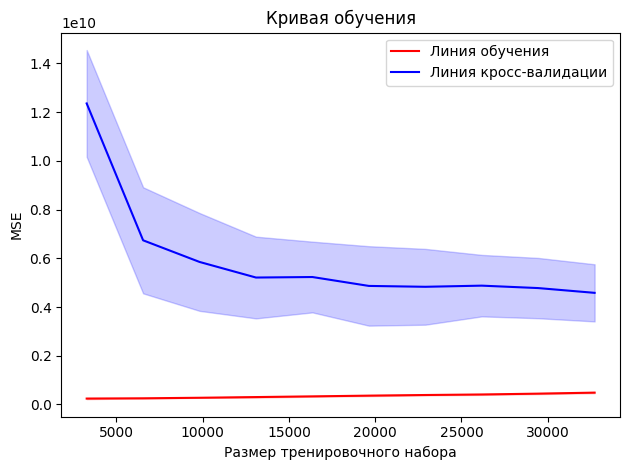

In [ ]:
# Вычислим оценки кросс-валидации для разных размеров обучающего набора
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))

# Преобразуем отрицательные значения оценок в положительные
train_scores = -train_scores
test_scores = -test_scores

# Вычислим среднюю оценку и стандартное отклонение для каждого размера обучающего набора
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.plot(train_sizes, train_mean, label="Линия обучения", color="r")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r", alpha=0.2)
plt.plot(train_sizes, test_mean, label="Линия кросс-валидации", color="b")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="b", alpha=0.2)

plt.title("Кривая обучения")
plt.xlabel("Размер тренировочного набора"), plt.ylabel("MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


## 8) Сохраняем лучшую модель

In [ ]:
best_model.save_model('/content/drive/MyDrive/E-soft/ТЗ/ver_final/catboost_model.dump')

## 9) Выводим график "Важности признаков"

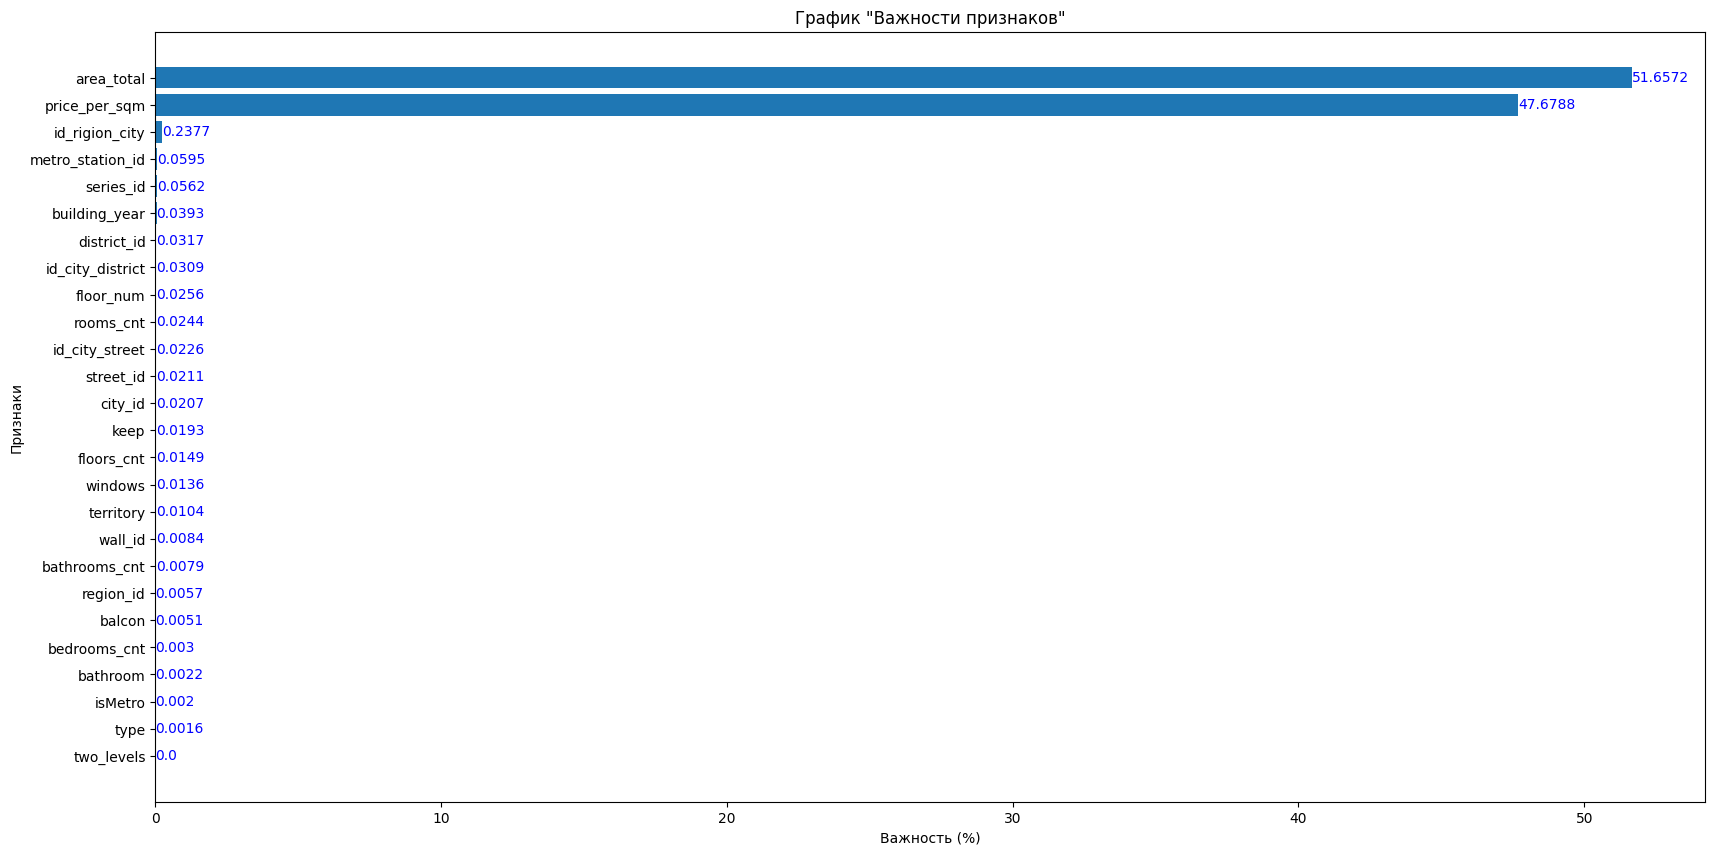

In [ ]:
importance = best_model.get_feature_importance()

# Задаем названия признаков
feature_names = [ 'city_id', 'district_id', 'street_id', 'metro_station_id', 'floor_num', 'floors_cnt',
                 'rooms_cnt', 'bedrooms_cnt', 'building_year', 'area_total', 'type', 'two_levels', 'bathroom', 'bathrooms_cnt',
                 'windows', 'territory', 'keep', 'series_id', 'wall_id', 'balcon', 'region_id', 'isMetro', 'id_rigion_city',
                 'id_city_district', 'id_city_street', 'price_per_sqm']


# Создаем словарь из названий признаков и их важности
feature_importance_dict = dict(zip(feature_names, importance))

# Сортируем словарь по убыванию важности признаков
sorted_feature_importance_dict = dict(sorted(feature_importance_dict.items(), 
                                             key=lambda x: x[1], reverse=False))

# Создаем список с названиями признаков, отсортированный по убыванию важности
sorted_feature_names = list(sorted_feature_importance_dict.keys())

# Создаем список с важностью признаков, отсортированный по убыванию
sorted_importance = list(sorted_feature_importance_dict.values())

# Создаем график важности признаков с горизонтальными линиями
plt.figure(figsize=(20, 10))
plt.barh(sorted_feature_names, sorted_importance) 
plt.title('График "Важности признаков"')
plt.xlabel('Важность (%)')  
plt.ylabel('Признаки')

# Добавляем цифры над каждой линией
for i, v in enumerate(sorted_importance):
    plt.text(v, i, str(round(v,4)), color='blue', va='center')

plt.show()


## 10) Выводим систему оценивания объектов недвижимости по их параметрам

**Добавляем столбец 'sold_price_predict' - Предсказанная цена продажи (Руб.)**

In [ ]:
data_result['sold_price_predict'] = best_model.predict(data_result)

**Выводим сравние 'sold_price' и 'sold_price_predict'**

In [ ]:
data_result['sold_price_predict'] = data_result['sold_price_predict'].astype(int)

df = pd.DataFrame(data_result)

df = df.rename(columns={'sold_price': 'Исходная цена продажи (Руб.)', 'sold_price_predict': 'Предсказанная цена продажи (Руб.)'})

display(df[['Исходная цена продажи (Руб.)','Предсказанная цена продажи (Руб.)']].head(10))


,Исходная цена продажи (Руб.),Предсказанная цена продажи (Руб.)
0,4880000,4876390
1,2550000,2540276
2,2200000,2217496
3,2200000,2194485
4,2000000,1979107
5,4300000,4309244
6,3450000,3466887
7,9600000,9869064
8,3100000,3112621
9,3500000,3521237
